# COVID MALAMBO

In [1]:
import pandas as pd
import scipy.integrate as spi
from scipy.optimize import curve_fit 
import datetime as dt
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
#from uncertainties import ufloat
plt.style.use('ggplot')

## SIR Model

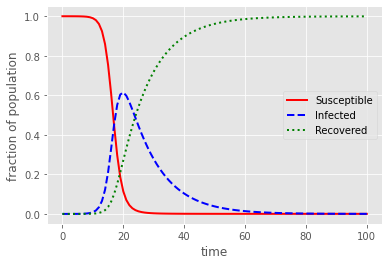

In [2]:
beta=0.8
alpha=0.1
def model(z,t):
    s=z[0]
    i=z[1]
    r=z[2]
    dsdt=-beta*s*i
    didt=beta*s*i-alpha*i
    drdt=alpha*i
    dzdt=[dsdt,didt,drdt]
    return dzdt
z0=[0.999992,0.000008,0]
t=np.arange(0, 101,1)
z=spi.odeint(model,z0,t)
s=z[:,0]
i=z[:,1]
r=z[:,2]
plt.plot(t,s,'r-',linewidth=2,label='Susceptible')
plt.plot(t,i,'b--',linewidth=2,label='Infected')
plt.plot(t,r,'g:',linewidth=2,label='Recovered')
plt.xlabel('time')
plt.ylabel('fraction of population')
plt.legend(loc='best')
plt.show()

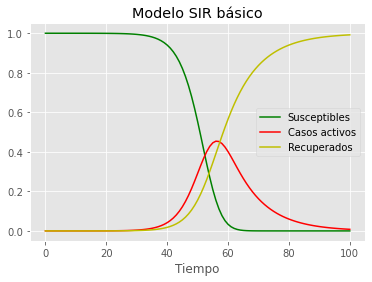

In [3]:
N=1
beta=0.8
alpha=0.1
TS=1.0 
ND=100.0
S0=0.999992
E0=0.000008
INPUT = (S0, E0, 0.0)


def diff_eqs(INP,t):  
    Y=np.zeros((3))
    V = INP
    Y[0] = - beta * V[0] * V[2]
    Y[1] = beta * V[0] * V[2] - alpha * V[1]
    Y[2] = alpha * V[1]
    return Y   # For odeint

t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)
pl.plot(RES[:,0]*N, '-g', label='Susceptibles')
pl.plot(RES[:,1]*N, '-r', label='Casos activos')
pl.plot(RES[:,2]*N, '-y', label='Recuperados')
pl.legend(loc=0)
pl.title('Modelo SIR básico')
pl.xlabel('Tiempo')
pl.savefig('sirpy')

## Data analysis

In [6]:
#We read the data from the csv file
df=pd.read_csv('data/Casos_positivos_de_COVID-19_en_Colombia-2.csv', encoding='utf8')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3106: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
df.head(20)

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,16/3/2020 0:00:00,59,14/3/2020 0:00:00,8001,BARRANQUILLA,8001,BARRANQUILLA,20,1,M,...,724.0,ESPAÑA,Recuperado,13/3/2020 0:00:00,NaN,16/3/2020 0:00:00,27/3/2020 0:00:00,PCR,6.0,NaN
1,16/3/2020 0:00:00,61,16/3/2020 0:00:00,8001,BARRANQUILLA,8001,BARRANQUILLA,21,1,M,...,724.0,ESPAÑA,Recuperado,10/3/2020 0:00:00,NaN,16/3/2020 0:00:00,24/3/2020 0:00:00,PCR,6.0,NaN
2,19/3/2020 0:00:00,104,19/3/2020 0:00:00,8001,BARRANQUILLA,8001,BARRANQUILLA,48,1,F,...,724.0,ESPAÑA,Recuperado,15/3/2020 0:00:00,NaN,19/3/2020 0:00:00,25/3/2020 0:00:00,PCR,6.0,NaN
3,19/3/2020 0:00:00,126,18/3/2020 0:00:00,8001,BARRANQUILLA,8001,BARRANQUILLA,52,1,F,...,840.0,ESTADOS UNIDOS DE AMÉRICA,Recuperado,6/3/2020 0:00:00,NaN,19/3/2020 0:00:00,31/3/2020 0:00:00,PCR,5.0,NaN
4,19/3/2020 0:00:00,127,18/3/2020 0:00:00,8001,BARRANQUILLA,8001,BARRANQUILLA,30,1,F,...,NaN,NaN,Recuperado,16/3/2020 0:00:00,NaN,19/3/2020 0:00:00,29/3/2020 0:00:00,PCR,6.0,NaN
5,21/3/2020 0:00:00,203,21/3/2020 0:00:00,8001,BARRANQUILLA,8001,BARRANQUILLA,24,1,F,...,840.0,ESTADOS UNIDOS DE AMÉRICA,Recuperado,14/3/2020 0:00:00,NaN,21/3/2020 0:00:00,28/3/2020 0:00:00,PCR,6.0,NaN
6,21/3/2020 0:00:00,204,21/3/2020 0:00:00,8001,BARRANQUILLA,8001,BARRANQUILLA,35,1,M,...,840.0,ESTADOS UNIDOS DE AMÉRICA,Recuperado,10/3/2020 0:00:00,NaN,21/3/2020 0:00:00,24/3/2020 0:00:00,PCR,6.0,NaN
7,24/3/2020 0:00:00,324,16/3/2020 0:00:00,8001,BARRANQUILLA,8001,BARRANQUILLA,57,1,M,...,591.0,PANAMA,Recuperado,16/3/2020 0:00:00,NaN,24/3/2020 0:00:00,30/3/2020 0:00:00,PCR,6.0,NaN
8,24/3/2020 0:00:00,325,20/3/2020 0:00:00,8001,BARRANQUILLA,8001,BARRANQUILLA,19,1,F,...,724.0,ESPAÑA,Recuperado,17/3/2020 0:00:00,NaN,24/3/2020 0:00:00,3/4/2020 0:00:00,PCR,6.0,NaN
9,25/3/2020 0:00:00,421,20/3/2020 0:00:00,8,ATLANTICO,8758,SOLEDAD,21,1,F,...,NaN,NaN,Recuperado,15/3/2020 0:00:00,NaN,25/3/2020 0:00:00,10/4/2020 0:00:00,PCR,6.0,NaN


In [8]:
df=df[df['Nombre municipio']=='MALAMBO']
df=df[['fecha reporte web','Estado','Sexo','Edad']]

In [9]:
df.head(20)

,fecha reporte web,Estado,Sexo,Edad
94,13/4/2020 0:00:00,Leve,M,36
107,18/4/2020 0:00:00,Leve,M,8
135,24/4/2020 0:00:00,Fallecido,F,76
136,24/4/2020 0:00:00,Fallecido,F,85
214,27/4/2020 0:00:00,Leve,M,50
217,27/4/2020 0:00:00,Leve,M,50
226,28/4/2020 0:00:00,Leve,M,29
237,28/4/2020 0:00:00,Fallecido,M,72
239,28/4/2020 0:00:00,Fallecido,M,46
269,30/4/2020 0:00:00,Fallecido,M,59


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9176 entries, 94 to 342550
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   fecha reporte web  9176 non-null   object
 1   Estado             9115 non-null   object
 2   Sexo               9176 non-null   object
 3   Edad               9176 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 358.4+ KB


In [11]:
df.dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9115 entries, 94 to 342550
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   fecha reporte web  9115 non-null   object
 1   Estado             9115 non-null   object
 2   Sexo               9115 non-null   object
 3   Edad               9115 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 356.1+ KB


In [13]:
df.describe()

,Edad
count,9115.000000
mean,38.622929
std,18.055899
min,1.000000
25%,25.000000
50%,36.000000
75%,51.000000
max,103.000000


### Estado

In [19]:
df_estado=df.groupby(['Estado'])['Estado'].count().to_frame('Total').reset_index()
df_estado

,Estado,Total
0,Fallecido,361
1,Leve,8705
2,Moderado,1
3,leve,48


<AxesSubplot:xlabel='Estado', ylabel='Total'>

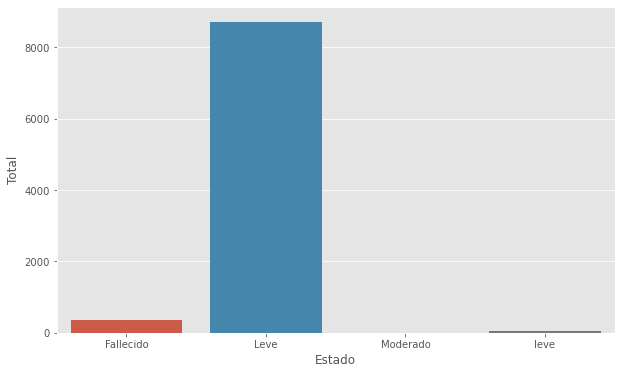

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Estado', y='Total', data=df_estado, ax=ax)

([<matplotlib.patches.Wedge at 0x7fd7d9794820>,
 [Text(-0.1365123557795455, 1.091496393360747, 'Fallecido'),
  Text(0.11806002779898758, -1.0936461172774776, 'Leve'),
  Text(0.03676872105901023, 1.0993853105948272, 'Moderado'),
  Text(0.01819746906536451, 1.0998494679362332, 'leve')],
 [Text(-0.07446128497066118, 0.595361669105862, '4.0%'),
  Text(0.06439637879944776, -0.5965342457877151, '95.5%'),
  Text(0.020055666032187395, 0.5996647148699057, '0.0%'),
  Text(0.00992589221747155, 0.5999178916015817, '0.5%')])

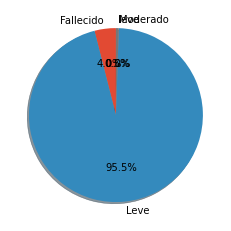

In [21]:
plt.pie(df_estado['Total'], labels=df_estado['Estado'], autopct='%1.1f%%', shadow=True, startangle=90)

In [2]:
#Definimos la data y seleccionamos municipio de Malambo junto a las variables sexo y edad
df=pd.read_csv(r'C:\\Users\\asus\\OneDrive - Universidad de la Costa - CUC\\Data analysis\\Covid_Colombia\\Casos_positivos_de_COVID-19_en_Colombia.csv', encoding='utf8')
df=df[df['Nombre municipio']=='MALAMBO']
df=df[['fecha reporte web','Estado','Sexo','Edad']]

#Fecha
df_date=df.groupby(['fecha reporte web','Estado']).size().reset_index(name='Conteo')
df_date['fecha reporte web']=pd.to_datetime(df_date['fecha reporte web'],format="%d/%m/%Y %H:%M:%S")
df_date=df_date.sort_values(by='fecha reporte web').reset_index()
df_date['Estado']=df_date['Estado'].apply(lambda x: x.upper())
df_date_c=df_date.groupby('fecha reporte web',as_index=False).agg({'Conteo':'sum'})
df_date_m=df_date[df_date['Estado']=='FALLECIDO'].groupby('fecha reporte web')['Conteo'].sum().reset_index(name="Muertos")
df_date=pd.merge(df_date_c,df_date_m,on='fecha reporte web',how='left')
df_date['Muertos']=df_date['Muertos'].fillna(0.0).astype(int)
df_date=df_date.set_index('fecha reporte web')
df_date = df_date.resample('D').sum().fillna(0)
df_date['Conteo acumulado']=df_date['Conteo'].cumsum()
df_date['Muertos acumulado']=df_date['Muertos'].cumsum()
df_date=df_date.assign(Suceptibles=129148-df_date['Conteo acumulado'])
df_date=df_date.assign(Porce_Conteo=df_date['Conteo acumulado']/129148)
df_date=df_date.assign(Porce_Sucep=df_date['Suceptibles']/129148)



C:\Users\asus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (14,22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


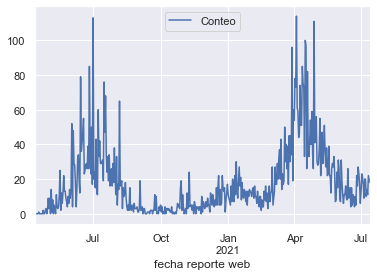

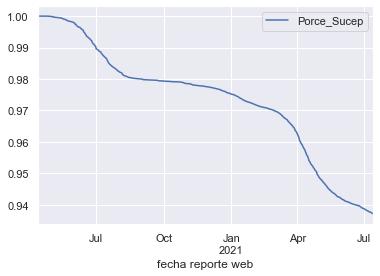

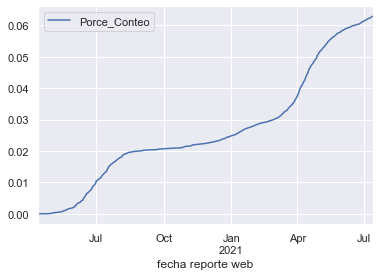

In [7]:
df_date_diario=df_date[['Conteo']]
df_date_sucep=df_date[['Porce_Sucep']]
df_date_conteo=df_date[['Porce_Conteo']]
df_date_diario.plot()
df_date_sucep.plot()
df_date_conteo.plot()

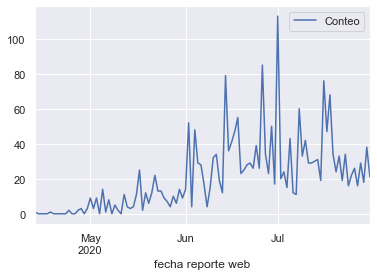

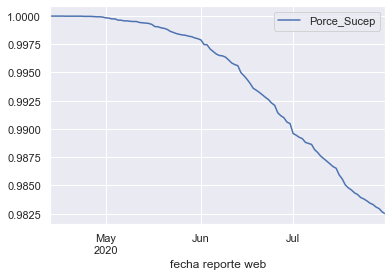

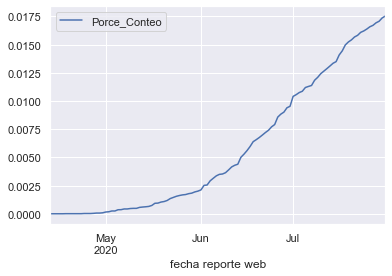

In [8]:
#Primera ola
df1d=df_date_diario[:110]
df1=df_date_sucep[:110]
df2=df_date_conteo[:110]
df1d.plot()
df1.plot()
df2.plot()

Best fit parameters:
r = 0.1022+/-0.0005


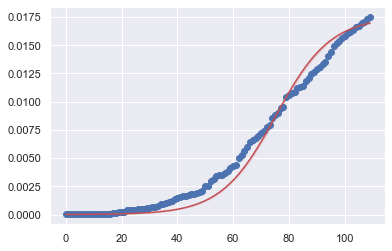

In [116]:
def growth(x,r):
    return (0.0175*0.000008*np.exp(x*r)/(0.0175+0.000008*(np.exp(r*x)-1)))
ye=np.array(df2['Porce_Conteo'])
xe=np.arange(110)
plt.plot(xe, ye,'bo', label='Data')
popt,pcov=curve_fit(growth,xe,ye)
sigma_ab = np.sqrt(np.diagonal(pcov))

r = ufloat(popt[0], sigma_ab[0])
text_res = "Best fit parameters:\nr = {}".format(r)
print(text_res)


plt.scatter(xe, ye, facecolor = 'silver',edgecolor = 'k', s = 10, alpha = 1)
xfit=np.arange(110)
plt.plot(xfit,growth(xfit,*popt),'r')
bound_upper = growth(xfit, *(popt + sigma_ab))
bound_lower = growth(xfit, *(popt - sigma_ab))

plt.fill_between(xfit, bound_lower, bound_upper,
                 color = 'r', alpha = 0.15)


plt.show()



Text(0.5, 0, 'Tiempo')

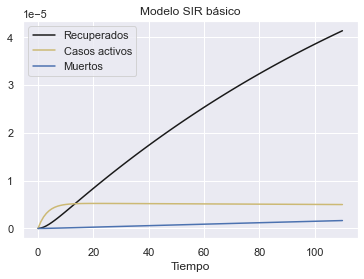

In [119]:
N=1
beta=0.1022
alpha=0.2
gamma=0.1
delta=0.0055
epsilon=0.003
TS=1.0 
ND=110.0
S0=0.999992
E0=0.000008
INPUT = (S0, E0, 0.0, 0.0, 0.0)


def diff_eqs(INP,t):  
    Y=np.zeros((5))
    V = INP
    Y[0] = - beta * V[0] * V[2]+delta*V[3]
    Y[1] = beta * V[0] * V[2] - alpha * V[1]
    Y[2] = alpha * V[1]-gamma*V[2]-epsilon*V[2]
    Y[3] = gamma*V[2]-delta*V[3]
    Y[4] = epsilon*V[2]
    return Y   # For odeint

t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)
#pl.plot(RES[:,0]*N, '-g', label='Susceptibles')
pl.plot(RES[:,3]*N, '-k', label='Recuperados')
#pl.plot(RES[:,1]*N, '-r', label='En periodo de incubación')
pl.plot(RES[:,2]*N, '-y', label='Casos activos')
pl.plot(RES[:,4]*N, '-b', label='Muertos')
pl.legend(loc=0)
pl.title('Modelo SIR básico')
pl.xlabel('Tiempo')

In [3]:
#Edad y sexo
df=pd.read_csv(r'C:\\Users\\asus\\OneDrive - Universidad de la Costa - CUC\\Data analysis\\Covid_Colombia\\Casos_positivos_de_COVID-19_en_Colombia.csv', encoding='utf8')
df=df[df['Nombre municipio']=='MALAMBO']
df=df[['fecha reporte web','Estado','Sexo','Edad']]



C:\Users\asus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (14,22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


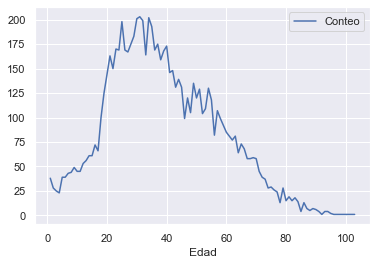

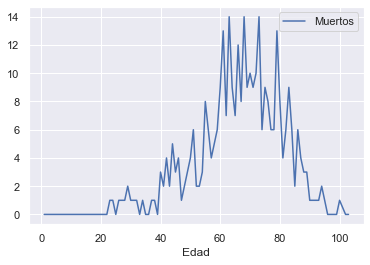

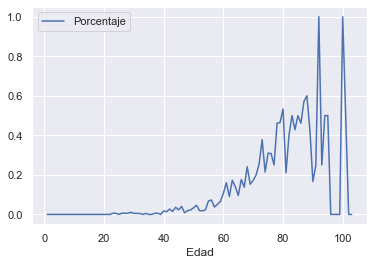

In [4]:
df_edad=df.groupby(['Edad','Estado']).size().reset_index(name='Conteo')
df_edad['Estado']=df_edad['Estado'].apply(lambda x: x.upper())
df_edad_c=df_edad.groupby('Edad',as_index=False).agg({'Conteo':'sum'})
df_edad_m=df_edad[df_edad['Estado']=='FALLECIDO'].groupby('Edad')['Conteo'].sum().reset_index(name="Muertos")
df_edad=pd.merge(df_edad_c,df_edad_m,on='Edad',how='left')
df_edad['Muertos']=df_edad['Muertos'].fillna(0.0).astype(int)
df_edad=df_edad.assign(Porcentaje=df_edad['Muertos']/df_edad['Conteo'])
df_edad=df_edad.set_index('Edad')
df_edad.plot(y='Conteo')
df_edad.plot(y='Muertos')
df_edad.plot(y='Porcentaje')

In [5]:
df_edads=df.groupby(['Sexo','Edad','Estado']).size().reset_index(name='Conteo')
df_edads['Estado']=df_edads['Estado'].apply(lambda x: x.upper())
df_edads_c=df_edads.groupby(['Sexo','Edad']).agg({'Conteo':'sum'}).reset_index()
df_edads_m=df_edads[df_edads['Estado']=='FALLECIDO'].groupby(['Sexo','Edad']).agg({'Conteo':'sum'}).reset_index()
df_edads_m=df_edads_m.rename(columns={"Conteo":"Muertos"})
df_edads=pd.merge(df_edads_c,df_edads_m,on=['Edad','Sexo'],how='left')
df_edads['Muertos']=df_edads['Muertos'].fillna(0.0).astype(int)
df_edads=df_edads.assign(Porcentaje=df_edads['Muertos']/df_edads['Conteo'])

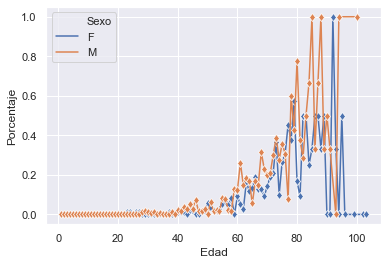

In [6]:
sns.lineplot(x='Edad',y='Porcentaje', data=df_edads, hue='Sexo', marker='d')

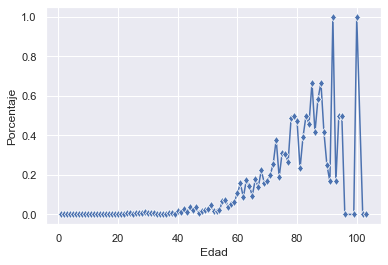

In [8]:
sns.lineplot(x='Edad',y='Porcentaje', data=df_edads, marker='d',ci=None)